In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
df = pd.read_csv("../data/infections_testconsumption_dilution.csv")
df_c = pd.read_csv("../data/infections_testconsumption_constant80.csv")

In [3]:
df

,num_groups,pool_size,cumInfections_naive_mean,cumInfections_naive_sem,cumInfections_correlated_mean,cumInfections_correlated_sem,cumInfections_correlated_weak_mean,cumInfections_correlated_weak_sem,cum_num_tests_naive_mean,cum_num_tests_naive_sem,cum_num_tests_correlated_mean,cum_num_tests_correlated_sem,cum_num_tests_correlated_weak_mean,cum_num_tests_correlated_weak_sem,daily_effective_efficiency_naive_mean,daily_effective_efficiency_naive_sem,daily_effective_efficiency_correlated_mean,daily_effective_efficiency_correlated_sem,daily_effective_efficiency_correlated_weak_mean,daily_effective_efficiency_correlated_weak_sem
0,1,5,2051.251256,20.948657,2036.974874,20.938199,2026.618090,19.709068,204713.658291,46.884009,202338.507538,24.620735,203310.673367,31.903768,0.009603,0.000202,0.009698,0.000222,0.009593,0.000214
1,1,10,2159.271357,22.040444,2111.959799,20.553085,2130.849246,20.224624,117401.698492,172.379207,111139.562814,106.466337,113476.331658,125.851888,0.017120,0.000332,0.017842,0.000396,0.017570,0.000366
2,1,15,2198.236181,20.309189,2136.145729,21.116896,2158.502513,19.970672,94480.914573,245.832145,84284.015075,169.396782,87949.507538,189.785725,0.021197,0.000354,0.023224,0.000491,0.022420,0.000433
3,1,20,2244.809045,20.194822,2164.708543,20.589415,2184.130653,20.747775,87538.919598,320.688229,73405.060302,213.569509,78299.080402,255.659501,0.023102,0.000333,0.026552,0.000519,0.025094,0.000446
4,2,5,2135.326633,21.721077,2090.291457,21.263999,2129.708543,21.175840,107648.492462,76.645796,104466.020101,46.439610,105830.763819,57.271161,0.018798,0.000412,0.019108,0.000458,0.019168,0.000437
5,2,10,2248.648241,20.880999,2166.512563,21.818692,2218.497487,20.935744,69359.472362,173.992836,61889.949749,118.284114,64592.914573,135.319101,0.029575,0.000527,0.032254,0.000697,0.031517,0.000639
6,2,15,2348.668342,20.659370,2203.502513,20.323019,2249.326633,22.130061,63490.336683,251.096354,51096.366834,161.095621,55032.989950,203.466489,0.033189,0.000472,0.038812,0.000765,0.036661,0.000661
7,2,20,2348.005025,21.637944,2264.125628,19.272534,2283.231156,18.934727,64053.422111,331.098113,48336.175879,194.222546,53337.763819,224.074098,0.032638,0.000420,0.041786,0.000757,0.038241,0.000611
8,3,5,2370.517588,22.416997,2250.291457,20.596024,2312.889447,20.358772,76187.638191,88.330823,72178.236181,49.897944,73855.768844,62.376560,0.029259,0.000621,0.029646,0.000701,0.029609,0.000668
9,3,10,2470.949749,21.664425,2303.929648,22.219851,2365.155779,21.396123,54812.924623,179.365668,46196.608040,124.179896,49334.296482,140.482771,0.040633,0.000660,0.045524,0.000946,0.043496,0.000824


In [4]:
df_c

,num_groups,pool_size,cumInfections_naive_mean,cumInfections_naive_sem,cumInfections_correlated_weak_mean,cumInfections_correlated_weak_sem,cum_num_tests_naive_mean,cum_num_tests_naive_sem,cum_num_tests_correlated_weak_mean,cum_num_tests_correlated_weak_sem
0,1,5,279.829146,3.058090,282.231156,3.222344,181109.301508,1428.455763,181033.974874,1336.497181
1,1,10,278.442211,3.235067,286.658291,3.204209,94856.296482,789.005617,95946.824121,677.022168
2,1,15,286.804020,3.347291,282.582915,3.035876,70093.105528,549.335426,68395.864322,481.599062
3,1,20,282.427136,3.371260,286.241206,2.967277,57488.412060,455.126687,55796.216080,391.710808
4,2,5,459.487437,5.004409,454.959799,5.533297,103132.557789,239.467738,102445.618090,218.755049
5,2,10,460.361809,4.978739,455.467337,5.300558,59108.346734,184.241976,57049.170854,166.977684
6,2,15,471.693467,5.232533,466.814070,5.350959,47823.753769,204.521020,44718.537688,150.567256
7,2,20,461.894472,5.837577,458.216080,5.129190,44041.703518,243.164146,39707.924623,179.982632
8,3,5,704.381910,7.642017,701.447236,8.171127,72963.954774,66.647609,71667.110553,56.852018
9,3,10,697.095477,8.986094,696.557789,8.214892,46761.221106,167.769437,44176.708543,123.454551


Text(0.5, 1.0, 'Cumulative infections vs. test consumption across different screening policies')

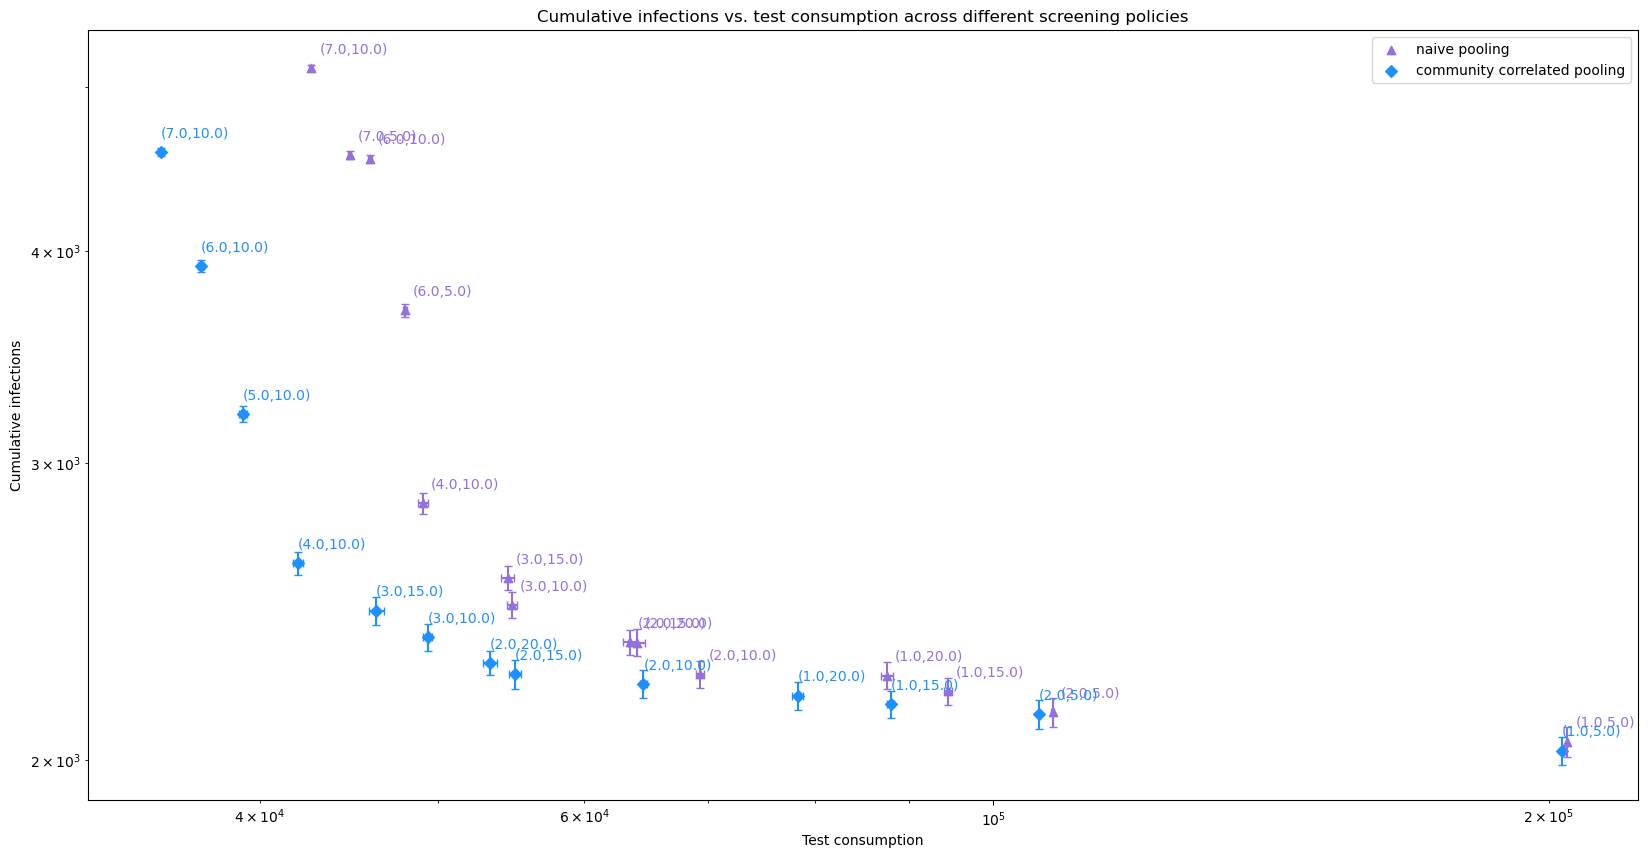

In [5]:
# compute pareto set for dilution test error model

pooling_methods = ["naive", "correlated_weak"]

markerdict = { # screening frequency
    "naive": "^",
    "correlated": "o",
    "correlated_weak": "D"   
}

legends_dict = {
    "naive": "naive pooling",
    "correlated": "household correlated pooling",
    "correlated_weak": "community correlated pooling",
}
    
colors = {
    "naive": "mediumpurple",
    "correlated": "mediumseagreen",
    "correlated_weak": "dodgerblue",
}

plt.figure(figsize=(20,10))
legends = {}

all_results = defaultdict(list)
pareto_results = defaultdict(list)

texts = []


for pooling_method in pooling_methods:

    for row_idx, row in df.iterrows():
        result_single = [
            row["num_groups"], row["pool_size"],
            row[f"cum_num_tests_{pooling_method}_mean"], row[f"cum_num_tests_{pooling_method}_sem"],
            row[f"cumInfections_{pooling_method}_mean"], row[f"cumInfections_{pooling_method}_sem"]
        ]
        all_results[pooling_method].append(result_single)
    
    # sort pareto_np and pareto_cp by num_tests in ascending order
    # in each np/cp list, the point with the smallest num_tests cannot be dominated by any other point
    all_results[pooling_method].sort(key=lambda x: x[4])

    # then, iterate through the sorted list and keep only points not dominated by the previous point
    # it suffices to compare the kth with the k-1 th point only, because k-1 th point is not dominated by any point before it (ie must have lower cum infections)
    # so if the kth point has lower cum infections than the k-1 th point, then it has lower cum infections than (is not dominated by) any point before it
    pareto_results[pooling_method] = [all_results[pooling_method][0]]
    for i in range(1, len(all_results[pooling_method])):
        if all_results[pooling_method][i][2] < pareto_results[pooling_method][-1][2]:
            pareto_results[pooling_method].append(all_results[pooling_method][i])
    
    for i in range(len(pareto_results[pooling_method])):
        num_groups, pool_size, num_tests, num_tests_sem, cum_infections, cum_infections_sem = pareto_results[pooling_method][i]
        scatter = plt.scatter(
            num_tests,
            cum_infections,
            color=colors[pooling_method],
            marker=markerdict[pooling_method],
            facecolors = colors[pooling_method]
        )
        # disable if don't want errorbars
        plt.errorbar(
            num_tests,
            cum_infections,
            xerr=2*num_tests_sem,
            yerr=2*cum_infections_sem,
            fmt='none',
            ecolor=colors[pooling_method],
            capsize=3
        )
        if num_groups == 1:
            legend_label = legends_dict[pooling_method]
            legends[legend_label] = scatter
        if pooling_method == "correlated":
            plt.annotate(f"({num_groups},{pool_size})", (num_tests*(0.95), cum_infections*(0.97)), color=colors[pooling_method])

        elif pooling_method == "correlated_weak":
            plt.annotate(f"({num_groups},{pool_size})", (num_tests, cum_infections*1.02), color=colors[pooling_method])

        else:
            plt.annotate(f"({num_groups},{pool_size})", (num_tests*1.01, cum_infections*1.02), color=colors[pooling_method])


plt.xlabel("Test consumption")
plt.ylabel("Cumulative infections")

plt.xscale('log')
plt.yscale('log')

plt.legend(legends.values(), legends.keys(), loc='upper right')

plt.title("Cumulative infections vs. test consumption across different screening policies")


Text(0.5, 1.0, 'Cumulative infections vs. test consumption across different screening policies')

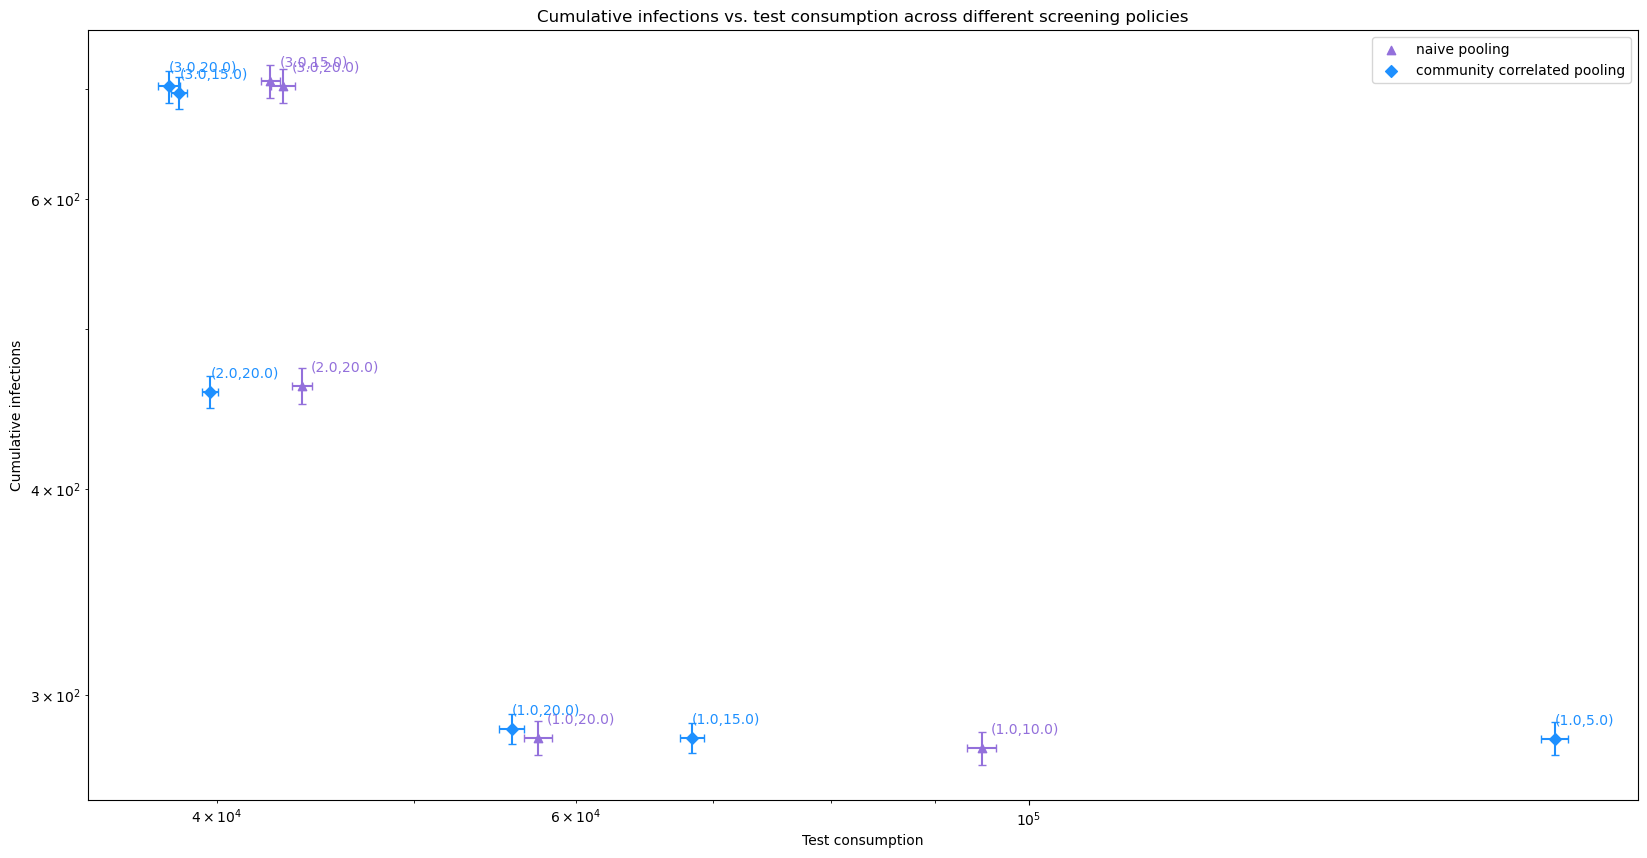

In [6]:
# compute pareto set for 80% sensitivity test error model

pooling_methods = ["naive", "correlated_weak"]

markerdict = { # screening frequency
    "naive": "^",
    "correlated": "o",
    "correlated_weak": "D"   
}

legends_dict = {
    "naive": "naive pooling",
    "correlated": "household correlated pooling",
    "correlated_weak": "community correlated pooling",
}
    
colors = {
    "naive": "mediumpurple",
    "correlated": "mediumseagreen",
    "correlated_weak": "dodgerblue",
}

plt.figure(figsize=(20,10))
legends = {}

all_results_c = defaultdict(list)
pareto_results_c = defaultdict(list)

texts = []


for pooling_method in pooling_methods:

    for row_idx, row in df_c.iterrows():
        result_single = [
            row["num_groups"], row["pool_size"],
            row[f"cum_num_tests_{pooling_method}_mean"], row[f"cum_num_tests_{pooling_method}_sem"],
            row[f"cumInfections_{pooling_method}_mean"], row[f"cumInfections_{pooling_method}_sem"]
        ]
        all_results_c[pooling_method].append(result_single)
    
    # sort pareto_np and pareto_cp by num_tests in ascending order
    # in each np/cp list, the point with the smallest num_tests cannot be dominated by any other point
    all_results_c[pooling_method].sort(key=lambda x: x[4])

    # then, iterate through the sorted list and keep only points not dominated by the previous point
    # it suffices to compare the kth with the k-1 th point only, because k-1 th point is not dominated by any point before it (ie must have lower cum infections)
    # so if the kth point has lower cum infections than the k-1 th point, then it has lower cum infections than (is not dominated by) any point before it
    pareto_results_c[pooling_method] = [all_results_c[pooling_method][0]]
    for i in range(1, len(all_results_c[pooling_method])):
        if all_results_c[pooling_method][i][2] < pareto_results_c[pooling_method][-1][2]:
            pareto_results_c[pooling_method].append(all_results_c[pooling_method][i])
    
    for i in range(len(pareto_results_c[pooling_method])):
        num_groups, pool_size, num_tests, num_tests_sem, cum_infections, cum_infections_sem = pareto_results_c[pooling_method][i]
        scatter = plt.scatter(
            num_tests,
            cum_infections,
            color=colors[pooling_method],
            marker=markerdict[pooling_method],
            facecolors = colors[pooling_method]
        )
        # disable if don't want errorbars
        plt.errorbar(
            num_tests,
            cum_infections,
            xerr=2*num_tests_sem,
            yerr=2*cum_infections_sem,
            fmt='none',
            ecolor=colors[pooling_method],
            capsize=3
        )
        if num_groups == 1:
            legend_label = legends_dict[pooling_method]
            legends[legend_label] = scatter
        if pooling_method == "correlated":
            plt.annotate(f"({num_groups},{pool_size})", (num_tests*(0.95), cum_infections*(0.97)), color=colors[pooling_method])

        elif pooling_method == "correlated_weak":
            plt.annotate(f"({num_groups},{pool_size})", (num_tests, cum_infections*1.02), color=colors[pooling_method])

        else:
            plt.annotate(f"({num_groups},{pool_size})", (num_tests*1.01, cum_infections*1.02), color=colors[pooling_method])


plt.xlabel("Test consumption")
plt.ylabel("Cumulative infections")

plt.xscale('log')
plt.yscale('log')

plt.legend(legends.values(), legends.keys(), loc='upper right')

plt.title("Cumulative infections vs. test consumption across different screening policies")


In [7]:
from collections import defaultdict

def get_critical_test_capacity_and_policy(pareto_results, df):

    critical_test_consumptions = [l[2] for l in pareto_results["correlated_weak"]] + [l[2] for l in pareto_results["naive"]]
    critical_test_consumptions.sort(reverse=True)

    corr_dilution = pareto_results["correlated_weak"]
    corr_dilution.sort(key=lambda x: x[2], reverse=True)

    naive_dilution = pareto_results["naive"]
    naive_dilution.sort(key=lambda x: x[2], reverse=True)

    true_outcomes = df[
        ["pool_size", "num_groups", "cum_num_tests_correlated_weak_mean", "cumInfections_correlated_weak_mean"]
    ]

    # loop over corr_dilution
    # find entry in corr_no_dilution with closest and smaller test consumption

    # for each point in corr_dilution, find the closest point in corr_no_dilution
    # if the closest point in corr_no_dilution has smaller test consumption, then compare the outcomes



    scenarios = defaultdict(int)
    regret = []
    feasible = []
    test_overuse = []

    policies = []

    true_idx = 0
    model_idx = 0


    for i, critical_test_consumption in enumerate(critical_test_consumptions):

        while true_idx < len(corr_dilution) and corr_dilution[true_idx][2] > critical_test_consumption:
            true_idx += 1
        if true_idx == len(corr_dilution):
            print(critical_test_consumption, "true idx reached end")
            break

        while model_idx < len(naive_dilution) and naive_dilution[model_idx][2] > critical_test_consumption:
            model_idx += 1
        if model_idx == len(naive_dilution):
            print(critical_test_consumption, "model idx reached end")
            break


        # model-based optimal policy if you believe in no dilution
        num_groups, pool_size, num_tests, num_tests_sem, cum_infections, cum_infections_sem = naive_dilution[model_idx]

        # true optimal policy
        num_groups_, pool_size_, num_tests_, num_tests_sem_, cum_infections_, cum_infections_sem_ = corr_dilution[true_idx]

        
        policies.append((i, (int(num_groups_), int(pool_size_)), (int(num_groups), int(pool_size))))


        # actual outcomes of model-based optimal policy
        true_outcome_per_cp = true_outcomes[
            (true_outcomes["num_groups"] == num_groups)
            & (true_outcomes["pool_size"] == pool_size)
        ]
        actual_num_tests = true_outcome_per_cp["cum_num_tests_correlated_weak_mean"].values[0]
        actual_cum_infections = true_outcome_per_cp["cumInfections_correlated_weak_mean"].values[0]

        regret.append(actual_cum_infections - cum_infections_)
        if actual_num_tests <= critical_test_consumption:
            feasible.append(1)
        else:
            feasible.append(0)
        test_overuse.append(actual_num_tests - critical_test_consumption)


    return critical_test_consumptions, policies

In [8]:
critical_test_consumptions, policies = get_critical_test_capacity_and_policy(pareto_results, df)
critical_test_consumptions_c, policies_c = get_critical_test_capacity_and_policy(pareto_results_c, df_c)



41963.693467336685 model idx reached end
39707.92462311558 model idx reached end


In [9]:
critical_test_consumptions_c

[181033.97487437187,
 94856.29648241206,
 68395.86432160804,
 57488.41206030151,
 55796.21608040201,
 44041.70351758794,
 43108.76381909548,
 42497.70854271357,
 39707.92462311558,
 38343.211055276384,
 37905.50753768844]

Text(0, 0.5, 'Cumulative infections')

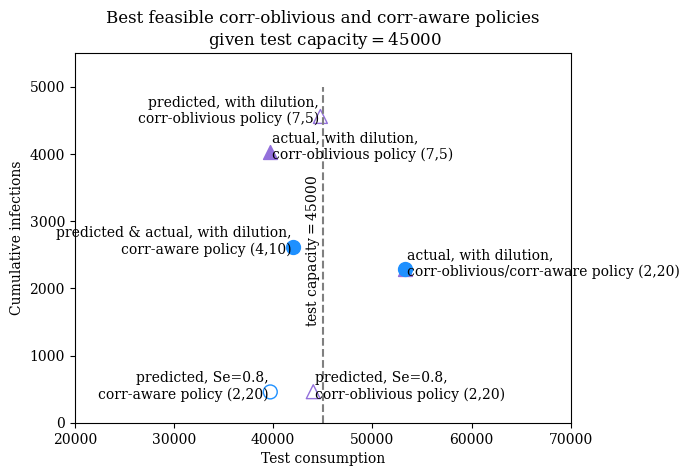

In [27]:
# use broken axis
# https://stackoverflow.com/questions/70700017/broken-y-axis-from-0-to-value-start-with-matplotlib-and-pandas-data 

plt.rcParams["font.family"] = 'serif'

fig, ax = plt.subplots()

test_capacity = 45000

ax.set_xlim(20000, 70000)
ax.set_ylim(0, 5500)

# plot points for dilution

policy_idx = 0
while critical_test_consumptions[policy_idx] > test_capacity:
    policy_idx += 1        

capacity_idx, true_optimal_policy, model_optimal_policy = policies[policy_idx]

modeled_outcome = df[
    (df["num_groups"] == model_optimal_policy[0])
    & (df["pool_size"] == model_optimal_policy[1])
]
optimal_outcome = df[
    (df["num_groups"] == true_optimal_policy[0])
    & (df["pool_size"] == true_optimal_policy[1])
]
actual_outcome = df[
    (df["num_groups"] == model_optimal_policy[0])
    & (df["pool_size"] == model_optimal_policy[1])
]

ax.scatter(
    modeled_outcome["cum_num_tests_naive_mean"],
    modeled_outcome["cumInfections_naive_mean"],
    color="mediumpurple",
    marker="^",
    facecolors = "none",
    # label=f"predicted, corr-obliv policy {model_optimal_policy}",
    s=100
)
ax.annotate(
    f"predicted, with dilution,\ncorr-oblivious policy ({model_optimal_policy[0]},{model_optimal_policy[1]})",
    (modeled_outcome["cum_num_tests_naive_mean"]-150, modeled_outcome["cumInfections_naive_mean"]-100),
    ha='right',
)

ax.scatter(
    actual_outcome["cum_num_tests_correlated_weak_mean"],
    actual_outcome["cumInfections_correlated_weak_mean"],
    color="mediumpurple",
    marker="^",
    # label=f"actual, corr-obliv policy {model_optimal_policy}",
    s=100
)
ax.annotate(
    f"actual, with dilution,\ncorr-oblivious policy ({model_optimal_policy[0]},{model_optimal_policy[1]})",
    (actual_outcome["cum_num_tests_correlated_weak_mean"]+180, actual_outcome["cumInfections_correlated_weak_mean"]-100),
    ha='left',
)

ax.scatter(
    optimal_outcome["cum_num_tests_correlated_weak_mean"],
    optimal_outcome["cumInfections_correlated_weak_mean"],
    color="dodgerblue",
    marker="o",
    s=100
)
ax.annotate(
    f"predicted & actual, with dilution,\ncorr-aware policy ({true_optimal_policy[0]},{true_optimal_policy[1]})",
    (optimal_outcome["cum_num_tests_correlated_weak_mean"]-150, optimal_outcome["cumInfections_correlated_weak_mean"]-100),
    ha='right',
)


# plot points for constant sensitivity

policy_idx_c = 0
while critical_test_consumptions_c[policy_idx_c] > test_capacity:
    policy_idx_c += 1        

capacity_idx_c, true_optimal_policy_c, model_optimal_policy_c = policies_c[policy_idx_c]

modeled_outcome_c = df_c[
    (df_c["num_groups"] == model_optimal_policy_c[0])
    & (df_c["pool_size"] == model_optimal_policy_c[1])
]
optimal_outcome_c = df_c[
    (df_c["num_groups"] == true_optimal_policy_c[0])
    & (df_c["pool_size"] == true_optimal_policy_c[1])
]
actual_outcome_np_fixed = df[
    (df["num_groups"] == model_optimal_policy_c[0])
    & (df["pool_size"] == model_optimal_policy_c[1])
]
actual_outcome_cp_fixed = df[
    (df["num_groups"] == true_optimal_policy_c[0])
    & (df["pool_size"] == true_optimal_policy_c[1])
]


ax.scatter(
    modeled_outcome_c["cum_num_tests_naive_mean"],
    modeled_outcome_c["cumInfections_naive_mean"],
    color="mediumpurple",
    marker="^",
    facecolors = "none",
    label=f"predicted, Se=0.8,\ncorr-oblivious policy {model_optimal_policy_c}",
    s=100
)
ax.annotate(
    f"predicted, Se=0.8,\ncorr-oblivious policy ({model_optimal_policy_c[0]},{model_optimal_policy_c[1]})",
    (modeled_outcome_c["cum_num_tests_naive_mean"]+180, modeled_outcome_c["cumInfections_naive_mean"]-100),
    ha='left',
)

ax.scatter(
    actual_outcome_np_fixed["cum_num_tests_correlated_weak_mean"],
    actual_outcome_np_fixed["cumInfections_correlated_weak_mean"],
    color="mediumpurple",
    marker="^",
    label=f"NP, actual, fixed err, {model_optimal_policy_c}",
    # label=f"actual, corr-obliv policy {model_optimal_policy}",
    s=100
)


ax.scatter(
    optimal_outcome_c["cum_num_tests_correlated_weak_mean"],
    optimal_outcome_c["cumInfections_correlated_weak_mean"],
    color="dodgerblue",
    facecolors = "none",
    marker="o",
    label=f"CP, predicted, fixed err, {true_optimal_policy_c}",
    s=100
)
ax.annotate(
    f"predicted, Se=0.8,\ncorr-aware policy ({true_optimal_policy_c[0]},{true_optimal_policy_c[1]})",
    (optimal_outcome_c["cum_num_tests_correlated_weak_mean"]-150, optimal_outcome_c["cumInfections_correlated_weak_mean"]-100),
    ha='right',
)
# ax2.annotate(
#     f"predicted & actual outcome,\ncorr-aware policy ({true_optimal_policy[0]},{true_optimal_policy[1]})",
#     (optimal_outcome["cum_num_tests_correlated_weak_mean"]-150, optimal_outcome["cumInfections_correlated_weak_mean"]-100),
#     ha='right',
# )


ax.scatter(
    actual_outcome_cp_fixed["cum_num_tests_correlated_weak_mean"],
    actual_outcome_cp_fixed["cumInfections_correlated_weak_mean"],
    color="dodgerblue",
    marker="o",
    label=f"CP, actual, fixed err, {true_optimal_policy_c}",
    # label=f"actual, corr-obliv policy {model_optimal_policy}",
    s=100
)
ax.annotate(
    f"actual, with dilution,\ncorr-oblivious/corr-aware policy ({true_optimal_policy_c[0]},{true_optimal_policy_c[1]})",
    (actual_outcome_cp_fixed["cum_num_tests_correlated_weak_mean"]+180, actual_outcome_cp_fixed["cumInfections_correlated_weak_mean"]-100),
    ha='left',
)

ax.set_title(
    f"Best feasible corr-oblivious and corr-aware policies\n given test capacity$=${test_capacity}",
    # x=0.51, y=0.97
)

ax.vlines(
    x = test_capacity,
    ymin = 0,
    ymax = 5000,
    color="grey", linestyle="--", 
)
ax.annotate(
    f"test capacity$=${test_capacity}",
    (test_capacity-100, 1500),
    ha='right',
    rotation=90
)

ax.set_xlabel("Test consumption")
ax.set_ylabel("Cumulative infections")

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig(f"../../figures/NP_CCP_zoomin_{test_capacity}.pdf", bbox_inches='tight')

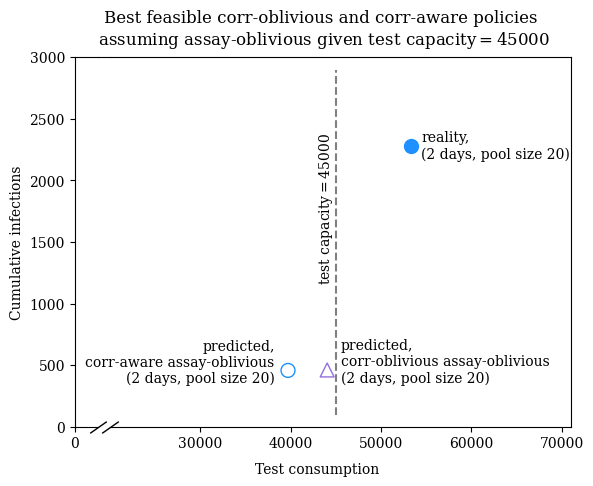

In [22]:
# use broken axis
# https://stackoverflow.com/questions/70700017/broken-y-axis-from-0-to-value-start-with-matplotlib-and-pandas-data 

plt.rcParams["font.family"] = 'serif'

plt.rcParams["font.family"] = 'serif'
fig, axes = plt.subplots(1, 2,
                            sharex='col', sharey='row',                               
                            gridspec_kw={
                                #    'height_ratios': [1, 0.05],
                                   'width_ratios': [0.05, 1]
                               })
ax1, ax2 = axes.flatten()
fig.subplots_adjust(hspace=0.05, wspace=0.05)

test_capacity = 45000

ax1.set_xlim(0,100)
ax2.set_xlim(20000, 71000)
ax2.set_ylim(0, 3000)

# plot points for constant sensitivity

policy_idx_c = 0
while critical_test_consumptions_c[policy_idx_c] > test_capacity:
    policy_idx_c += 1        

capacity_idx_c, true_optimal_policy_c, model_optimal_policy_c = policies_c[policy_idx_c]

modeled_outcome_c = df_c[
    (df_c["num_groups"] == model_optimal_policy_c[0])
    & (df_c["pool_size"] == model_optimal_policy_c[1])
]
optimal_outcome_c = df_c[
    (df_c["num_groups"] == true_optimal_policy_c[0])
    & (df_c["pool_size"] == true_optimal_policy_c[1])
]
actual_outcome_np_fixed = df[
    (df["num_groups"] == model_optimal_policy_c[0])
    & (df["pool_size"] == model_optimal_policy_c[1])
]
actual_outcome_cp_fixed = df[
    (df["num_groups"] == true_optimal_policy_c[0])
    & (df["pool_size"] == true_optimal_policy_c[1])
]


ax2.scatter(
    modeled_outcome_c["cum_num_tests_naive_mean"],
    modeled_outcome_c["cumInfections_naive_mean"],
    color="mediumpurple",
    marker="^",
    facecolors = "none",
    label=f"predicted, Se=0.8,\ncorr-oblivious policy {model_optimal_policy_c}",
    s=100
)
ax2.annotate(
    f"predicted,\ncorr-oblivious assay-oblivious\n({model_optimal_policy_c[0]} days, pool size {model_optimal_policy_c[1]})",
    (modeled_outcome_c["cum_num_tests_naive_mean"]+1500, modeled_outcome_c["cumInfections_naive_mean"]-100),
    ha='left',
)

# ax2.scatter(
#     actual_outcome_np_fixed["cum_num_tests_correlated_weak_mean"],
#     actual_outcome_np_fixed["cumInfections_correlated_weak_mean"],
#     color="mediumpurple",
#     marker="^",
#     label=f"NP, actual, fixed err, {model_optimal_policy_c}",
#     # label=f"actual, corr-obliv policy {model_optimal_policy}",
#     s=100
# )


ax2.scatter(
    optimal_outcome_c["cum_num_tests_correlated_weak_mean"],
    optimal_outcome_c["cumInfections_correlated_weak_mean"],
    color="dodgerblue",
    facecolors = "none",
    marker="o",
    label=f"CP, predicted, fixed err, {true_optimal_policy_c}",
    s=100
)
ax2.annotate(
    # f"predicted, Se=0.8,\ncorr-aware policy ({true_optimal_policy_c[0]},{true_optimal_policy_c[1]})",
    f"predicted,\ncorr-aware assay-oblivious\n({true_optimal_policy_c[0]} days, pool size {true_optimal_policy_c[1]})",
    (optimal_outcome_c["cum_num_tests_correlated_weak_mean"]-1500, optimal_outcome_c["cumInfections_correlated_weak_mean"]-100),
    ha='right',
)
# ax2.annotate(
#     f"predicted & actual outcome,\ncorr-aware policy ({true_optimal_policy[0]},{true_optimal_policy[1]})",
#     (optimal_outcome["cum_num_tests_correlated_weak_mean"]-150, optimal_outcome["cumInfections_correlated_weak_mean"]-100),
#     ha='right',
# )


ax2.scatter(
    actual_outcome_cp_fixed["cum_num_tests_correlated_weak_mean"],
    actual_outcome_cp_fixed["cumInfections_correlated_weak_mean"],
    color="dodgerblue",
    marker="o",
    label=f"CP, actual, fixed err, {true_optimal_policy_c}",
    # label=f"actual, corr-obliv policy {model_optimal_policy}",
    s=100
)
ax2.annotate(
    # f"reality,\ncorr-oblivious/aware\n policy ({true_optimal_policy_c[0]},{true_optimal_policy_c[1]})",
    f"reality,\n({true_optimal_policy_c[0]} days, pool size {true_optimal_policy_c[1]})",
    (actual_outcome_cp_fixed["cum_num_tests_correlated_weak_mean"]+1100, actual_outcome_cp_fixed["cumInfections_correlated_weak_mean"]-100),
    ha='left',
)

plt.suptitle(
    f"Best feasible corr-oblivious and corr-aware policies\n assuming assay-oblivious given test capacity$=${test_capacity}",
    x=0.51, y=0.98
)

ax2.vlines(
    x = test_capacity,
    ymin = 100,
    ymax = 2900,
    color="grey", linestyle="--", 
)
ax2.annotate(
    f"test capacity$=${test_capacity}",
    (test_capacity-100, 1200),
    ha='right',
    rotation=90
)

ax2.set_xlabel("Test consumption")
ax1.set_ylabel("Cumulative infections")
ax2.xaxis.set_label_coords(0.45, -0.095)


ax1.spines['right'].set_visible(False) 
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none') 
ax1.set_xticks(ax1.get_xticks()[:-1])
ax2.set_xticks(ax2.get_xticks()[1:-1])

d = 0.7  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)],
    markersize=12,  # "length" of cut-line
    linestyle='none',
    color='k',  # ?
    mec='k',  # ?
    mew=1,  # line thickness
    clip_on=False
)
ax1.plot([1],[0], transform=ax1.transAxes, **kwargs)
ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)

horizontal_patch = plt.Line2D(
    (ax1.get_position().xmax, ax2.get_position().xmin),
    (ax1.get_position().ymax, ax1.get_position().ymax), 
    color="k", linewidth=ax1.spines["top"]._linewidth)
fig.add_artist(horizontal_patch)
# plt.savefig(f"../../figures/NP_CCP_zoomin_{test_capacity}.pdf", bbox_inches='tight')

In [8]:
capacity_idx_c, true_optimal_policy_c, model_optimal_policy_c

(5, (2, 20), (2, 20))

In [9]:
actual_outcome_np_fixed

,num_groups,pool_size,cumInfections_naive_mean,cumInfections_naive_sem,cumInfections_correlated_mean,cumInfections_correlated_sem,cumInfections_correlated_weak_mean,cumInfections_correlated_weak_sem,cum_num_tests_naive_mean,cum_num_tests_naive_sem,cum_num_tests_correlated_mean,cum_num_tests_correlated_sem,cum_num_tests_correlated_weak_mean,cum_num_tests_correlated_weak_sem
7,2,20,2348.005025,21.637944,2264.125628,19.272534,2283.231156,18.934727,64053.422111,331.098113,48336.175879,194.222546,53337.763819,224.074098


In [10]:
actual_outcome_cp_fixed

,num_groups,pool_size,cumInfections_naive_mean,cumInfections_naive_sem,cumInfections_correlated_mean,cumInfections_correlated_sem,cumInfections_correlated_weak_mean,cumInfections_correlated_weak_sem,cum_num_tests_naive_mean,cum_num_tests_naive_sem,cum_num_tests_correlated_mean,cum_num_tests_correlated_sem,cum_num_tests_correlated_weak_mean,cum_num_tests_correlated_weak_sem
7,2,20,2348.005025,21.637944,2264.125628,19.272534,2283.231156,18.934727,64053.422111,331.098113,48336.175879,194.222546,53337.763819,224.074098
